In [59]:
import pandas as pd
import numpy as np
import json
from pathlib import Path
import matplotlib.pyplot as plt
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw

pd.set_option('display.max_rows', None)

In [2]:
from build_dataframe import build_ball_flight_df, build_summary_dict, build_bat_path_df

In [3]:
with open('../data/12345641_47821.jsonl') as f:
    json_file_1 = json.load(f)
path_1 = build_bat_path_df(json_file_1)

In [4]:
with open('../data/12345645_38027.jsonl') as f:
    json_file_2 = json.load(f)
path_2 = build_bat_path_df(json_file_2)

In [5]:
with open('../data/12345641_17546.jsonl') as f:
    json_file_3 = json.load(f)
path_3 = build_bat_path_df(json_file_3)

In [6]:
path_1.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
0,First,-0.369065,-2.911836,-1.522335,6.370982,-1.088927,-1.811310,4.368794
1,no_event,-0.365732,-2.907884,-1.525741,6.372628,-1.091347,-1.814598,4.364640
2,no_event,-0.362399,-2.903797,-1.528243,6.374268,-1.093185,-1.817217,4.360953
3,no_event,-0.359066,-2.899523,-1.529674,6.375935,-1.094373,-1.819130,4.357790
4,no_event,-0.355733,-2.895123,-1.530032,6.377550,-1.094912,-1.820420,4.355132


In [7]:
path_2.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
0,First,-0.393039,-3.290854,-1.612138,6.355468,-1.376476,-1.796355,4.427652
1,no_event,-0.389706,-3.284716,-1.613402,6.356546,-1.378212,-1.804674,4.421626
2,no_event,-0.386373,-3.279005,-1.613675,6.357900,-1.379783,-1.812574,4.416598
3,no_event,-0.383040,-3.273737,-1.612724,6.359598,-1.381319,-1.820383,4.412577
4,no_event,-0.379706,-3.268934,-1.610611,6.361558,-1.382629,-1.828015,4.409675


In [ ]:
# I want to pick a section of the data frame that represents the swing
# Each swing has a "Hit" or "Nearest" event tag. 
# If this is considered the middle of the swing, let's take 75 points before and after

In [31]:
def filter_path(path_df):
    mid_index = path_df.index[path_df.event.isin(['Hit', 'Nearest'])].to_list()
    start_index = mid_index[0] - 75
    end_index = mid_index[0] + 75
    return path_df[start_index:end_index]
filter_path_1 = filter_path(path_1)
filter_path_2 = filter_path(path_2)
filter_path_3 = filter_path(path_3)

In [32]:
# I want to normalize the swings so that each point is relative to the start
# This will avoid variability that may be introduced from the batter standing in a different
# position

In [33]:
filter_path_1.head()

,event,time,head_pos_0,head_pos_1,head_pos_2,handle_pos_0,handle_pos_1,handle_pos_2
174,no_event,0.210891,-2.769278,-0.857005,6.506983,-1.460457,-1.756338,4.294869
175,no_event,0.214224,-2.780496,-0.857542,6.499958,-1.463087,-1.747837,4.289287
176,no_event,0.217557,-2.791921,-0.859286,6.493256,-1.465434,-1.739448,4.283956
177,no_event,0.220890,-2.804052,-0.862740,6.486705,-1.467257,-1.731313,4.279032
178,no_event,0.224223,-2.817584,-0.868086,6.479760,-1.467832,-1.723420,4.274804


In [44]:
def normalize_path(path):
    pos_columns = ['head_pos_0', 'head_pos_1', 'head_pos_2',
                   'handle_pos_0', 'handle_pos_1', 'handle_pos_2']
    return path[pos_columns] - path[pos_columns].iloc[0]
normalized_path_1 = normalize_path(filter_path_1)
normalized_path_2 = normalize_path(filter_path_2)
normalized_path_3 = normalize_path(filter_path_3)

In [45]:
def combine_coordinates(df):
    return df[['head_pos_0', 'head_pos_1', 'head_pos_2',
               'handle_pos_0', 'handle_pos_1', 'handle_pos_2'
              ]].values
sequence1 = combine_coordinates(normalized_path_1)
sequence2 = combine_coordinates(normalized_path_2)
sequence3 = combine_coordinates(normalized_path_3)

In [60]:
def calculate_dtw_distance(df1, df2):
    """
    Calculates the DTW distance between two dataframes by computing the DTW distance for each coordinate separately.
    
    :param df1: First dataframe.
    :param df2: Second dataframe.
    :return: Aggregated DTW distance.
    """
    coordinates = ['head_pos_0', 'head_pos_1', 'head_pos_2',
                   'handle_pos_0', 'handle_pos_1', 'handle_pos_2']
    total_distance = 0.0
    
    for coordinate in coordinates:
        seq1 = df1[coordinate].values
        seq2 = df2[coordinate].values
        distance = dtw.distance(seq1, seq2)
        total_distance += distance
    
    return total_distance

# Calculate DTW distance
distance = calculate_dtw_distance(normalized_path_1, normalized_path_2)
print(f"DTW Distance between the swings: {distance}")

distance = calculate_dtw_distance(normalized_path_1, normalized_path_3)
print(f"DTW Distance between the swings: {distance}")

distance = calculate_dtw_distance(normalized_path_2, normalized_path_3)
print(f"DTW Distance between the swings: {distance}")

DTW Distance between the swings: 20.13514812804128
DTW Distance between the swings: 56.2003892097922
DTW Distance between the swings: 34.06511928752227


In [71]:
def vis_distance(df_1, df_2, pos):
    seq1 = df_1[pos].values
    seq2 = df_2[pos].values
    alignment_path = dtw.warping_path(seq1, seq2)
    
    plt.figure(figsize=(12, 6))
    plt.plot(seq1, label=f'Swing 1 {pos}')
    plt.plot(seq2, label=f'Swing 2 {pos}')
    for (i, j) in alignment_path:
        plt.plot([i, j], [seq1[i], seq2[j]], 'k-', alpha=0.5)
    
    plt.legend()
    plt.show()

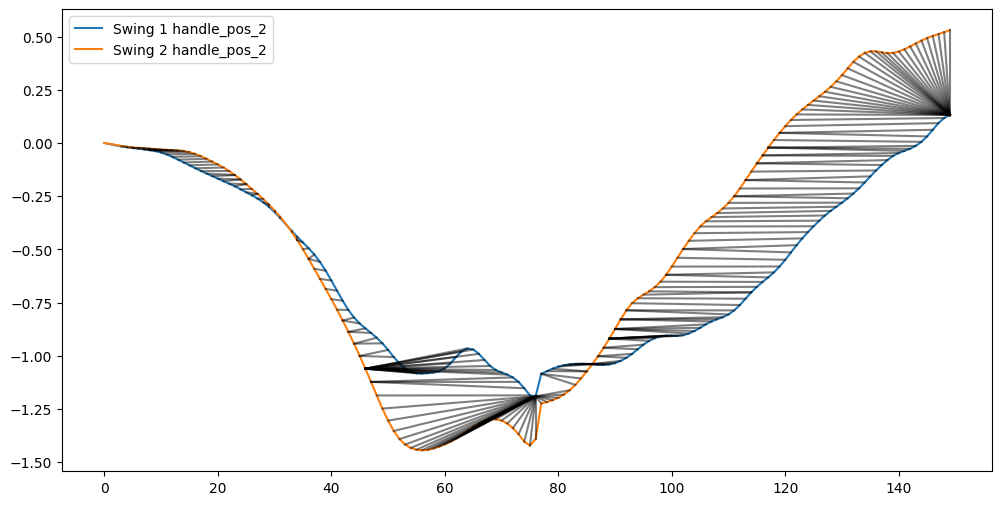

In [72]:
vis_distance(normalized_path_1, normalized_path_2, 'handle_pos_2')